## 30 seconds

In [1]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.optimizers import Adam
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
from keras.callbacks import TensorBoard, EarlyStopping
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)


try:
    model and parallel_model
except NameError:
    print("Good to go!")
    pass
else:   
    if model:
        del model
        del parallel_model
    print("Object has been cleaned!")


model = Sequential() 
model.add(Conv1D(filters = 32, kernel_size = 7, padding='same', input_shape = (trainData.shape[1], 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 7, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 7, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 256, kernel_size = 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 256, kernel_size = 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 512, kernel_size = 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 512, kernel_size = 3, padding='same',))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(4, activation = "softmax"))

print(model.summary())


adam = Adam(lr = 0.001)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics=['accuracy'])

# graph = TensorBoard()
early_stop = EarlyStopping(patience=20)
train_history_1 = model.fit(x = trainData,
                            y = trainLabel,
                            epochs=80,
                            validation_data=(validationData, validationLabel),
                            callbacks=[early_stop],
                            batch_size=70, 
                            verbose=1)
# model.save('model_30s.h5')

evaluation = model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))


print('Finish training!')

import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (5078, 9000, 1)
Train Label:  (5078, 4)
Vali Data:  (2032, 9000, 1)
Vali Label:  (2032, 4)
Test Data:  (3041, 9000, 1)
Test Label:  (3041, 4)
Good to go!
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 9000, 32)          256       
_________________________________________________________________
activation_1 (Activation)    (None, 9000, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 9000, 32)          128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4500, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4500, 32)          7200      
_________________________________________________________________
activation_2 (Activation)    (None, 4500, 

5078/5078 [==============================] - 5s 982us/step - loss: 0.4413 - acc: 0.8356 - val_loss: 0.5011 - val_acc: 0.8125
Epoch 21/80
5078/5078 [==============================] - 5s 1ms/step - loss: 0.4355 - acc: 0.8379 - val_loss: 0.5267 - val_acc: 0.8002
Epoch 22/80
5078/5078 [==============================] - 5s 971us/step - loss: 0.4311 - acc: 0.8430 - val_loss: 0.5149 - val_acc: 0.8086
Epoch 23/80
5078/5078 [==============================] - 5s 986us/step - loss: 0.4173 - acc: 0.8460 - val_loss: 0.5261 - val_acc: 0.8233
Epoch 24/80
5078/5078 [==============================] - 5s 1ms/step - loss: 0.4168 - acc: 0.8494 - val_loss: 0.5641 - val_acc: 0.8105
Epoch 25/80
5078/5078 [==============================] - 5s 967us/step - loss: 0.4053 - acc: 0.8580 - val_loss: 0.5391 - val_acc: 0.7977
Epoch 26/80
5078/5078 [==============================] - 5s 1ms/step - loss: 0.3934 - acc: 0.8582 - val_loss: 0.5494 - val_acc: 0.8155
Epoch 27/80
5078/5078 [==============================] - 5s

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_score)

In [2]:
from keras import backend as K
import pprint

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

# Testing
test = np.random.random((trainData.shape[1], 1))[np.newaxis,...]
layer_outs = [func([test]) for func in functors]
pprint.pprint(layer_outs)

[[array([[[-0.17479362,  0.2614714 ,  0.03239799, ...,  0.01125135,
         -0.07346149, -0.24756096],
        [-0.24847883,  0.27277437,  0.03623412, ..., -0.01803227,
         -0.13194561, -0.17802595],
        [-0.3409852 ,  0.27115685, -0.03087586, ..., -0.13087817,
         -0.00664551, -0.14448875],
        ...,
        [-0.12818672,  0.09765437, -0.10548794, ..., -0.02726372,
         -0.00115754, -0.02225547],
        [-0.08185092,  0.07402135, -0.03721559, ...,  0.02435363,
         -0.08601385, -0.16661033],
        [-0.13652857,  0.25169188,  0.09609877, ...,  0.01470644,
         -0.01689167, -0.16806498]]], dtype=float32)],
 [array([[[0.        , 0.2614714 , 0.03239799, ..., 0.01125135,
         0.        , 0.        ],
        [0.        , 0.27277437, 0.03623412, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.27115685, 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.09765437, 0.        , ..., 0

In [3]:
import pandas as pd

test_prediction = model.predict_classes(testData, batch_size=1)
pd.crosstab(testL, test_prediction, rownames=['Label'], colnames=['prediction'])

prediction,0,1,2,3
Label,,,,
0,196,1,8,65
1,4,45,20,20
2,10,2,1644,131
3,66,8,210,611


In [4]:
model.save('1D_model_30s_early_stopping.h5')

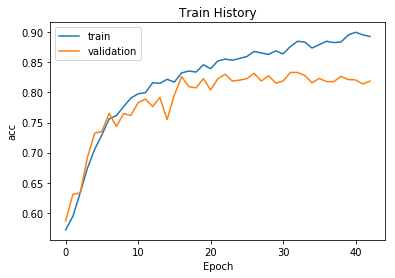

In [2]:
show_plot('acc', train_history_1)

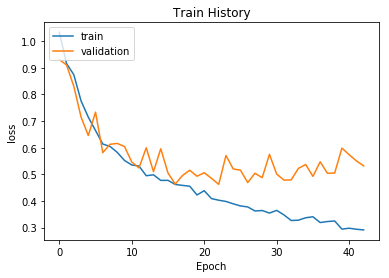

In [3]:
show_plot('loss', train_history_1)

## 30s k-fold

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import Activation
from keras.optimizers import Adam
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import TensorBoard, EarlyStopping
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainD = np.append(trainD, validationD, axis=0)
trainL = np.append(trainL, validationL, axis=0)
trainD = np.append(trainD, testD, axis=0)
trainL = np.append(trainL, testL, axis=0)

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)

Train Data: (10151, 9000, 1)
Train Label:  (10151, 4)


In [3]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)
print(kf)
'''
training_data = []
training_label = []
validation_cate_label = []
validation_data = []
validation_label = []

for train_index, test_index in kf.split(trainData):
    print('trian:', train_index, 'len', len(train_index), 'test:', test_index, 'len', len(test_index))
    training_data.append(trainData[train_index])
    training_label.append(trainLabel[train_index])
    validation_data.append(trainData[test_index])
    validation_label.append(trainLabel[test_index])
    validation_cate_label.append(trainL[test_index])

training_data = np.array(training_data)
training_label = np.array(training_label)
validation_data = np.array(validation_data)
validation_label = np.array(validation_label)
validation_cate_label = np.array(validation_cate_label)
'''

KFold(n_splits=5, random_state=None, shuffle=True)


"\ntraining_data = []\ntraining_label = []\nvalidation_cate_label = []\nvalidation_data = []\nvalidation_label = []\n\nfor train_index, test_index in kf.split(trainData):\n    print('trian:', train_index, 'len', len(train_index), 'test:', test_index, 'len', len(test_index))\n    training_data.append(trainData[train_index])\n    training_label.append(trainLabel[train_index])\n    validation_data.append(trainData[test_index])\n    validation_label.append(trainLabel[test_index])\n    validation_cate_label.append(trainL[test_index])\n\ntraining_data = np.array(training_data)\ntraining_label = np.array(training_label)\nvalidation_data = np.array(validation_data)\nvalidation_label = np.array(validation_label)\nvalidation_cate_label = np.array(validation_cate_label)\n"

In [5]:
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(learning_rate=0):
    model = Sequential() 
    model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 32, kernel_size = 7))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 64, kernel_size = 7))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 64, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 128, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 128, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))

    model.add(Conv1D(filters = 256, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 256, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))

    model.add(Conv1D(filters = 512, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))

    model.add(Conv1D(filters = 512, kernel_size = 3))
    model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(4, activation = "softmax"))
    
    adam = Adam(lr = learning_rate)
    model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics=['accuracy'])
#     print('Model finished!')
    
    return model

F1_result = []

batch_S = [30, 50, 70, 90, 120]
learning_rate = [0.00005, 0.0001, 0.0005, 0.001, 0.005]
parameter_grid = dict(batch_size=batch_S, learning_rate=learning_rate)
# early_stop = EarlyStopping(patience=20)
model = KerasClassifier(build_fn = create_model, epochs=80, verbose=1)
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, cv=kf, verbose = 1)
grid_result = grid.fit(trainData, trainLabel)

'''
for X_train, Y_train, X_val, Y_val, val_cat in zip(training_data, training_label, validation_data, validation_label, validation_cate_label):
        
    model = model_structure()
    
    early_stop = EarlyStopping(patience=20)
    train_history_1 = model.fit(x = X_train, 
                                y = Y_train,
                                epochs=80,
                                validation_data=(X_val, Y_val),
                                callbacks=[early_stop],
                                batch_size=100, 
                                verbose=1)
    evaluation = model.evaluate(x = X_val, y = Y_val)
    print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))
    
    validation_prediction = model.predict_classes(X_val, batch_size=100)
    result = f1_score(val_cat, validation_prediction, average=None)
    F1_result.append(result)
    del model
'''

print('Finish training!')

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Epoch 1/80
8120/8120 [==============================] - 9s 1ms/step - loss: 1.0606 - acc: 0.5765
Epoch 2/80
8120/8120 [==============================] - 9s 1ms/step - loss: 0.9917 - acc: 0.5846
Epoch 3/80
8120/8120 [==============================] - 9s 1ms/step - loss: 0.9371 - acc: 0.5899
Epoch 4/80
8120/8120 [==============================] - 8s 1ms/step - loss: 0.8927 - acc: 0.6148
Epoch 5/80
1650/8120 [=====>........................] - ETA: 6s - loss: 0.8555 - acc: 0.6491

KeyboardInterrupt: 

In [4]:
grid_result.best_score_

0.7102748500716274

In [5]:
grid_result.best_params_

{'batch_size': 60}

In [8]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean:%f (STD:%f) with: %r" % (mean, stdev, param))

0.710275 (0.012190) with: {'batch_size': 60}
0.698355 (0.022026) with: {'batch_size': 80}
0.689095 (0.023570) with: {'batch_size': 100}


In [5]:
print(F1_result)

[array([0.80653951, 0.72413793, 0.91091493, 0.7525299 ]), array([0.71134021, 0.69230769, 0.89750919, 0.71546203]), array([0.69295775, 0.62068966, 0.89452496, 0.68959108]), array([0.78181818, 0.51724138, 0.90533981, 0.7530648 ]), array([0.80108992, 0.52427184, 0.91609242, 0.76758682])]


In [7]:
tmp = [0,0,0,0]
for i in F1_result:
    tmp += i

tmp /= 5
print("<avg>")
print("AF: {}".format(tmp[0]))
print("Noise: {}".format(tmp[1]))
print("Normal: {}".format(tmp[2]))
print("Other: {}".format(tmp[3]))

# AF Noise Normal Other

<avg>
AF: 0.7587491124551075
Noise: 0.6157297004970255
Normal: 0.9048762601406286
Other: 0.7356469255184189


## Check Tensorflow & Keras

In [9]:
import tensorflow as tf
tf.__version__

'1.4.0'

In [1]:
import keras
keras.__version__

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.3'